# Random Forests to Forecast Stock Movements

In this project, we utilize Random Forests to forecast stock movements and develop a long-only trading strategy. We first tune two hyperparameters of the model, the number of decision trees and their maximum depth. Next, we evaluate the strategy via backtesting and compare it against the different baselines in terms of the sharpe ratio.   

# Introduction to Random Forests

- Random Forests are an **ensemble learning method** primarily used for classification and regression tasks.
- **Ensemble models** are machine learning techniques that combine the predictions from multiple individual models to produce a more accurate and robust overall prediction.
- Random Forests operate by constructing multiple **decision trees** during training and outputting the mode of the classes (classification) or mean prediction (regression) of the individual trees.
- **Decision trees** are machine learning models that recursively split the data into subsets based on feature values to make predictions, creating a tree-like structure of decisions.

## How Random Forests Work

1. **Bootstrap Sampling**: Random subsets of the training data are created with replacement.
2. **Decision Tree Construction**: Each subset is used to build a decision tree.
3. **Random Feature Selection**: At each split in the tree, a random subset of features is considered for splitting.
4. **Aggregation**: The predictions from all trees are combined (majority vote for classification, average for regression).

## Benefits of Random Forests

- **Robustness**: Reduces overfitting by averaging multiple trees.
- **Versatility**: Can be used for both classification and regression.
- **Feature Importance**: Provides estimates of feature importance.
- **High Performance**: Generally provides good performance with less need for hyperparameter tuning compared to other models.


## Disadvantages of Random Forests

- **Complexity**: The model can become large and complex, making it harder to interpret.
- **Training Time**: Can be slower to train compared to simpler models.
- **Memory Usage**: Requires more memory to store multiple trees.

# Hyperparameter Tuning

- Random Forests are a powerful ensemble learning method offering robustness, versatility, and good performance. However, to fully leverage their potential, hyperparameter tuning is crucial.
- Hyperparameters are configuration settings used to control the training process and the model's architecture, which are not learned from the data.
- Hyperparameter tuning is the process of optimizing these hyperparameters of a machine learning model to improve its performance.
- By using techniques like Grid Search, Random Search, or Bayesian Optimization, we can find the optimal hyperparameters to enhance model performance and reduce overfitting.


## Common Hyperparameters for Random Forests

- **`n_estimators`**: Number of trees in the forest.
- **`max_depth`**: Maximum depth of the trees.
- **`min_samples_split`**: Minimum number of samples required to split an internal node.
- **`min_samples_leaf`**: Minimum number of samples required to be at a leaf node.
- **`max_features`**: Number of features to consider when looking for the best split.

## Hyperparameter Tuning Techniques



### Grid Search
Grid Search exhaustively searches over a specified parameter grid. It trains and evaluates the model for every combination of hyperparameters.

### Random Search
Random search performs random combinations of the hyperparameter grid, which is computationally more efficient than Grid Search.

### Bayesian Optimization
Bayesian Optimization builds a probabilistic model to find the optimal hyperparameters. It is more efficient than Grid and Random Search, especially for complex models and large datasets.

# Feature Engineering

- Feature engineering is the process of using domain knowledge to create new features or transform existing features, capturing additional information and relationships to improve the performance of machine learning models.
- It is a critical step in the data preprocessing pipeline and can significantly influence the success of the model.

## Benefits of Feature Engineering

- **Improves Model Performance**: Better features can lead to more accurate and robust models.
- **Reduces Overfitting**: Properly engineered features can help generalize the model better to new data.
- **Simplifies the Model**: Useful features can simplify the model, making it more interpretable.
- **Enables Use of Simple Models**: With well-engineered features, even simpler models can achieve good performance.

## Examples of Feature Engineering

### Feature Creation
Feature creation consists of creating new features from existing data can capture additional information and relationships.

- **Mathematical Transformations**: Applying mathematical operations to create new features (e.g., square, log, interaction terms).
- **Aggregations**: Aggregating features over a window of time (e.g., rolling mean, sum, count).
- **Domain-Specific Features**: Creating features based on domain knowledge (e.g., technical indicators in finance).

### Feature Transformation
Transforming existing features to make them more suitable for modeling.

- **Normalization and Scaling**: Rescaling features to a common scale (e.g., Min-Max Scaling, Standard Scaling). For instance, we use this transformation on the close price and volume of a stock.
- **Encoding Categorical Variables**: Converting categorical variables to numerical values (e.g., One-Hot Encoding, Label Encoding). For example, if we use the date information to generate features, we should use this transformation.  

# Backtest

* Backtesting involves running a trading strategy using historical market data to determine how it would have performed in the past.
* **The goal is to estimate how the strategy might perform in the future based on historical results.**
* This technique helps investors and traders assess the viability and effectiveness of their strategies before applying them in real-time markets



## Limitations of Backtesting
- **Historical Bias:** Results may not always predict future performance due to changes in market conditions or economic environments.
- **Overfitting:** A strategy that performs exceptionally well in historical data might be too tailored to past conditions and may not perform well in the future.
- **Data Quality:** The accuracy of backtesting results depends on the quality and completeness of the historical data used.

# Metrics

## Total Return
The total return measures the overall profit or loss generated by an investment or trading strategy. It is calculated as:

<br>

$$
\text{Total Return} = \frac{P_{\text{final}} - P_{\text{initial}}}{P_{\text{initial}}}
$$

<br>

where:
- $ P_{\text{final}} $ is the final value of the investment.
- $ P_{\text{initial}} $ is the initial value of the investment.

## Annualized Return
The annualized return represents the average yearly return of an investment over a specified period. It accounts for compounding effects and is given by:

<br>

$$
\text{Annualized Return} = \left( \frac{P_{\text{final}}}{P_{\text{initial}}} \right)^{\frac{1}{T}} - 1
$$

<br>

where:
- $ P_{\text{final}} $ is the final value of the investment.
- $ P_{\text{initial}} $ is the initial value of the investment.
- $ T $ is the number of years.

## Annualized Standard Deviation

Standard deviation is a statistical measure that represents the dispersion or spread of a set of values. In finance, it is used to measure the volatility of an investment. Higher standard deviation indicates higher volatility, which implies greater risk. The Annualized Standard Deviation is, therefore, a measure used to quantify the amount of volatility in a set of financial returns on an annual basis. It helps investors understand the risk associated with an investment over a year.

<br>

$$
σ_{annual} = σ_{daily}\sqrt{252}
$$

<br>

where:
- $ σ_{annual} $ is the annualized standard deviation.
- $ σ_{daily} $ is the daily standard deviation.

## Sharpe Ratio
The Sharpe Ratio measures the risk-adjusted return of an investment by comparing the excess return to its volatility. It is calculated as:

$$
\text{Sharpe Ratio} = \frac{R_{\text{portfolio}} - R_{\text{risk-free}}}{\sigma_{\text{portfolio}}}
$$

where:
- $ R_{\text{portfolio}} $ is the return of the investment portfolio.
- $ R_{\text{risk-free}} $ is the risk-free rate of return (e.g., return on government bonds).
- $ \sigma_{\text{portfolio}} $ is the standard deviation of the portfolio returns (volatility).

# Implementation

# Load libraries and data

We first load the libraries and the historical data of the stock.

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

np.random.seed(42)

In [ ]:
# Define the stock symbol and time period
symbol = 'AAPL'
start_date = '2020-01-01'
end_date = '2024-01-01'

# Fetch historical data
data = yf.download(symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


# Feature Engineering

Before training the model, let's first create the feature that we will provide as input for model training. We start creating features based on domain knowledge, in specific using Relative Strength Index and Moving Average Convergence Divergence. Next, we create features using aggregations (rolling mean). Finally, we also create features based on their rate of change.

## Relative Strength Index (RSI)

The Relative Strength Index (RSI) is a momentum oscillator that measures the speed and change of price movements. It oscillates between 0 and 100 and is typically used to identify overbought or oversold conditions in a market.

In [ ]:
def calculate_rsi(data, window=14):
    """
    Calculate the Relative Strength Index (RSI) for a given pandas DataFrame.

    Parameters:
    data (pd.Series): A pandas Series of closing prices.
    window (int): The number of periods to use for calculating the RSI.

    Returns:
    pd.Series: A pandas Series containing the RSI values.
    """
    # Calculate the difference in price from the previous step
    delta = data.diff()

    # Get rid of the first NaN value
    delta = delta[1:]

    # Make the positive gains (up) and negative gains (down) Series
    up = delta.clip(lower=0)
    down = -delta.clip(upper=0)

    # Calculate the average gain and average loss
    roll_up = up.rolling(window=window).mean()
    roll_down = down.rolling(window=window).mean()

    # Calculate the RSI based on the average gain and average loss
    rs = roll_up / roll_down
    rsi = 100.0 - (100.0 / (1.0 + rs))

    return rsi

## Moving Average Convergence Divergence (MACD)

The Moving Average Convergence Divergence (MACD) is a trend-following momentum indicator that shows the relationship between two moving averages of a security’s price. The MACD is calculated by subtracting the 26-period Exponential Moving Average (EMA) from the 12-period EMA. A nine-day EMA of the MACD, called the "signal line," is then plotted on top of the MACD line, which can function as a trigger for buy and sell signals.

In [ ]:
def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    """
    Calculate the Moving Average Convergence Divergence (MACD) for a given pandas DataFrame.

    Parameters:
    data (pd.Series): A pandas Series of closing prices.
    short_window (int): The period for the short-term EMA (default is 12).
    long_window (int): The period for the long-term EMA (default is 26).
    signal_window (int): The period for the signal line EMA (default is 9).

    Returns:
    pd.DataFrame: A pandas DataFrame with columns for the MACD line, signal line, and MACD histogram.
    """
    # Calculate the short-term EMA
    short_ema = data.ewm(span=short_window, adjust=False).mean()

    # Calculate the long-term EMA
    long_ema = data.ewm(span=long_window, adjust=False).mean()

    # Calculate the MACD line
    macd_line = short_ema - long_ema

    # Calculate the signal line
    signal_line = macd_line.ewm(span=signal_window, adjust=False).mean()

    # Calculate the MACD histogram
    macd_histogram = macd_line - signal_line

    # Create a DataFrame to hold the MACD line, signal line, and histogram
    macd_df = pd.DataFrame({
        'MACD': macd_line,
        'Signal_Line': signal_line,
        'MACD_Histogram': macd_histogram
    })

    return macd_df

Now we will:
* create features based on their rate of change (ROC)
* normalize some features
* calculate rolling means using different periods
* one-hot encode calendar features
* create RSI and MACD features


In [ ]:
# Rate of change
data['ROC_5'] = data['Close'].pct_change(periods=5)
data['ROC_10'] = data['Close'].pct_change(periods=10)
data['ROC_20'] = data['Close'].pct_change(periods=20)

# Volume change
data['Volume_Change'] = data['Volume'].pct_change()

# Normalize features
scaler = MinMaxScaler()
data[['Close', 'Volume', 'Open', 'High', 'Low']] = scaler.fit_transform(data[['Close', 'Volume', 'Open', 'High', 'Low']])

# Rolling statistics
data['Rolling_Mean_5'] = data['Close'].rolling(window=5).mean()
data['Rolling_Mean_10'] = data['Close'].rolling(window=10).mean()
data['Rolling_Mean_20'] = data['Close'].rolling(window=20).mean()

# Exponential smoothing
data['EMA_5'] = data['Close'].ewm(span=5, adjust=False).mean()
data['EMA_10'] = data['Close'].ewm(span=10, adjust=False).mean()
data['EMA_20'] = data['Close'].ewm(span=20, adjust=False).mean()

# Volume-based features
data['Volume_MA_5'] = data['Volume'].rolling(window=5).mean()
data['Volume_MA_10'] = data['Volume'].rolling(window=10).mean()
data['Volume_MA_20'] = data['Volume'].rolling(window=20).mean()

# Momentum
data['Momentum_5'] = data['Close'].diff(periods=5)
data['Momentum_10'] = data['Close'].diff(periods=10)
data['Momentum_20'] = data['Close'].diff(periods=20)

data['RSI_14'] = calculate_rsi(data['Close'], window=14)
data['MACD'] = calculate_macd(data['Close'])['MACD']

# Normalize RSI and MACD
data[['RSI_14','MACD']] = scaler.fit_transform(data[['RSI_14','MACD']])

# Date-based features
data['Day_of_Week'] = data.index.dayofweek
data['Month'] = data.index.month

# Perform one-hot encoding on day of week and month
data = pd.get_dummies(data, columns=['Day_of_Week', 'Month'], prefix=['DOW', 'M'], dtype=int)

# Ranges
data['Daily_Range'] = data['High'] - data['Low']

# Drop rows with NaN values
data.dropna(inplace=True)

In [ ]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'ROC_5',
       'ROC_10', 'ROC_20', 'Volume_Change', 'Rolling_Mean_5',
       'Rolling_Mean_10', 'Rolling_Mean_20', 'EMA_5', 'EMA_10', 'EMA_20',
       'Volume_MA_5', 'Volume_MA_10', 'Volume_MA_20', 'Momentum_5',
       'Momentum_10', 'Momentum_20', 'RSI_14', 'MACD', 'DOW_0', 'DOW_1',
       'DOW_2', 'DOW_3', 'DOW_4', 'M_1', 'M_2', 'M_3', 'M_4', 'M_5', 'M_6',
       'M_7', 'M_8', 'M_9', 'M_10', 'M_11', 'M_12', 'Daily_Range'],
      dtype='object')

# Training, Validation, and Test Sets

In [ ]:
# Define features and target
features = data.columns[5:]
y = data['Close'].pct_change().dropna().apply(lambda x: x > 0).astype(int)
X = data[features].iloc[1:] # the first return we can calculate is on the day t + 1. Hence, we start at +index 1.

train_size = 0.8
val_size = 0.1 # validation set for hyperparameter tuning

separator_train = int(len(data)*train_size)
separator_val = int(len(data)*(train_size + val_size))

X_train = X.iloc[:separator_train]
X_val = X.iloc[separator_train:separator_val]
X_test = X.iloc[separator_val:]

y_train = y.iloc[:separator_train]
y_val = y.iloc[separator_train:separator_val]
y_test = y.iloc[separator_val:]

print(f'Train size: {len(X_train)}')
print(f'Validation size: {len(X_val)}')
print(f'Test size: {len(X_test)}')

Train size: 788
Validation size: 99
Test size: 98


In [ ]:
def train_test(X_train, y_train, X_test, y_test, max_depth, n_estimators):
    model = RandomForestClassifier(max_depth=max_depth,
                               n_estimators=n_estimators,
                               random_state=1)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Predictions
    y_pred = model.predict(X_test)
    return y_pred

In [ ]:
# Predictions
y_pred = train_test(X_train, y_train, X_val, y_val, 5, 50)

# Evaluate
accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.54


# Baseline
A baseline is needed to compare the strategy's performance against a standard or benchmark, helping to determine if the strategy adds value beyond a simple buy-and-hold approach or other basic strategies.


Some examples of baselines commonly used in financial backtesting:

- **Buy and Hold Strategy**: This baseline involves purchasing a security and holding it for a period without any active trading. It helps to compare the performance of a trading strategy against the simple approach of holding an asset.

- **Random Trading Strategy**: This involves making trades at random intervals or amounts. It serves as a baseline to ensure that the strategy outperforms random chance.

- **Market Index**: Using a relevant market index (e.g., S&P 500, NASDAQ) as a benchmark helps to compare the strategy's performance against the overall market performance.

- **Risk-Free Rate**: Comparing the strategy's returns to the risk-free rate (e.g., returns from U.S. Treasury bonds) to determine if the strategy provides better returns than a virtually risk-free investment.

## Risk-free Rate

In [ ]:
years = len(X_test)/252
rf_annual = 0.02

# returns
rf_daily = (1 + rf_annual)**(1/252) - 1
rf_cumprod = np.cumprod([1 + rf_daily for i in range(len(X_test))])

print(f'\nRisk-free net return ({len(X_test)} trading days): {rf_cumprod[-1] - 1:.2%}')
print(f'Risk-free annual return: {rf_annual:.2%}')

# volatility (by definition, Risk-free asset does not have volatility)
print(f'Risk-free annual volatility: {0:.2%}')


Risk-free net return (98 trading days): 0.77%
Risk-free annual return: 2.00%
Risk-free annual volatility: 0.00%


## Buy and hold

In [ ]:
# returns
df = yf.download(symbol, start=X_test.index[0], end=end_date)
df['Return'] = df['Close'].pct_change()
bnh_returns = df.loc[X_test.index, 'Return']
bnh_returns_cumprod = bnh_returns.add(1).cumprod()
bnh_annual_return = bnh_returns_cumprod.iloc[-1]**(1/years) - 1
print(f'\nBuy and hold net return ({len(X_test)} trading days): {bnh_returns_cumprod.iloc[-1] - 1:.2%}')
print(f'Buy and hold annual return: {bnh_annual_return:.2%}')

# volatility
bnh_vol = bnh_returns.std()
bnh_annual_vol = bnh_vol * np.sqrt(252)
print(f'Buy and hold annual volatility: {bnh_annual_vol:.2%}')

# sharpe ratio
sr_bnh = (bnh_annual_return - rf_annual) / bnh_annual_vol
print(f'Buy and hold sharpe ratio: {sr_bnh:.2f}')

[*********************100%%**********************]  1 of 1 completed


Buy and hold net return (98 trading days): 8.29%
Buy and hold annual return: 22.73%
Buy and hold annual volatility: 18.63%
Buy and hold sharpe ratio: 1.11


## Random

In [ ]:
# returns
df = yf.download(symbol, start=X_test.index[0], end=end_date)
df['Return'] = df['Close'].pct_change()
df = df.copy()
df['Strategy'] = 0
df.iloc[-len(X_test):, df.columns.get_loc('Strategy')] = np.random.choice([0, 1], size=len(X_test))
df['Strategy'] = df['Strategy'].shift(1)
df['Strategy_returns'] = df['Strategy'].mul(df['Return'])
df['Strategy_returns_cumprod'] = df['Strategy_returns'].add(1).cumprod()

random_returns = df['Strategy_returns']
random_returns_cumprod = df['Strategy_returns_cumprod']
random_annual_return = random_returns_cumprod.iloc[-1]**(1/years) - 1
print(f'\nRandom net return ({len(X_test)} trading days): {random_returns_cumprod.iloc[-1] - 1:.2%}')
print(f'Random annual return: {random_annual_return:.2%}')

# volatility
random_vol = df['Strategy_returns'].std()
random_annual_vol = random_vol * np.sqrt(252)
print(f'Random annual volatility: {random_annual_vol:.2%}')

# sharpe ratio
sr_random = (random_annual_return - rf_annual) / random_annual_vol
print(f'Random sharpe ratio: {sr_random:.2f}')

[*********************100%%**********************]  1 of 1 completed


Random net return (98 trading days): 4.92%
Random annual return: 12.99%
Random annual volatility: 14.17%
Random sharpe ratio: 0.78


## Market Index: S&P500

In [ ]:
# returns
df = yf.download('^GSPC', start=X_test.index[0], end=end_date)
df['Return'] = df['Close'].pct_change()

sp500_returns = df.loc[X_test.index, 'Return']
sp500_returns_cumprod = sp500_returns.add(1).cumprod()
sp500_annual_return = sp500_returns_cumprod.iloc[-1]**(1/years) - 1
print(f'\nS&P500 net return ({len(X_test)} trading days): {sp500_returns_cumprod.iloc[-1] - 1:.2%}')
print(f'S&P500 annual return: {sp500_annual_return:.2%}')

# volatility
sp500_vol = sp500_returns.std()
sp500_annual_vol = sp500_vol * np.sqrt(252)
print(f'S&P500 annual volatility: {sp500_annual_vol:.2%}')

# sharpe ratio
sr_sp500 = (sp500_annual_return - rf_annual) / sp500_annual_vol
print(f'S&P500 sharpe ratio: {sr_sp500:.2f}')

[*********************100%%**********************]  1 of 1 completed


S&P500 net return (98 trading days): 6.85%
S&P500 annual return: 18.37%
S&P500 annual volatility: 12.28%
S&P500 sharpe ratio: 1.33


In [ ]:
sharpe_ratios = {sr_bnh, sr_random, sr_sp500}
total_annual_returns = [bnh_annual_return, random_annual_return, sp500_annual_return, rf_annual]
annual_volatilities = [bnh_annual_vol, random_annual_vol, sp500_annual_vol]

In [ ]:
sharpe_ratios

[1.1126123690934215, 0.7760584961320471, 1.3332257815305102]

# Backtest

We backtest to determine the potential profitability and risk of the strategy.

In [ ]:
def backtest(y_pred, plot=False):
    ALPHA = 0.35
    df = data.copy()
    df['Signal'] = 0
    df.iloc[-len(y_pred):, df.columns.get_loc('Signal')] = y_pred

    df['Return'] = df['Close'].pct_change()

    df['Strategy'] = df['Signal'] #.apply(lambda x:-1 if x==0 else x)
    df['Strategy'] = df['Strategy'].shift(1)
    df['Strategy_returns'] = df['Strategy'].mul(df['Return'])
    df['Strategy_returns_cumprod'] = df['Strategy_returns'].add(1).cumprod()

    print(f"""Buy and hold Sharpe Ratio {sr_bnh:.2}\nRandom Sharpe Ratio {sr_random:.2}\nS&P500 Sharpe Ratio {sr_sp500:.2}
          """)

    if plot:
        plt.plot(X_test.index, rf_cumprod, label='Risk-free rate', c='k', alpha=ALPHA)
        plt.plot(bnh_returns_cumprod, label=f'Buy and hold', c='b', alpha=ALPHA)
        plt.plot(random_returns_cumprod, label='Random', c='g', alpha=ALPHA)
        plt.plot(sp500_returns_cumprod, label='S&P500', c='gray', alpha=ALPHA)
        plt.plot(df['Strategy_returns_cumprod'].iloc[-len(y_pred):], label='Strategy', c='r', linewidth=1.5)
        plt.legend()

    return df

# Hyperparameter tuning

In [ ]:
depths = [*range(2, 12, 2)]
estimators = [*range(50, 350, 50)]
hyperparameters = {}

for max_depth in tqdm(depths):
    for n_estimators in estimators:
        key = f'MD-{max_depth}_E-{n_estimators}'

        # Train Random Forest and get predictions
        y_pred = train_test(X_train, y_train, X_val, y_val, max_depth, n_estimators)

        # Evaluate
        accuracy = accuracy_score(y_val, y_pred)

        # Get backtest results
        df = backtest(y_pred)

        years = len(y_pred)/252
        vol = df['Strategy_returns'].std()
        annual_vol = vol * np.sqrt(252)
        net_return = df['Strategy_returns_cumprod'].iloc[-1] - 1
        annual_ret = (1 + net_return)**(1/years) - 1
        sharpe = (annual_ret - rf_annual) / annual_vol

        hyperparameters[key]={
            'net_return':net_return,
            'vol':vol,
            'sharpe':sharpe,
            'accuracy':accuracy,
            'max_depth':max_depth,
            'n_estimators':n_estimators
        }

hyperparameters = pd.DataFrame(hyperparameters).T

100%|██████████| 5/5 [00:20<00:00,  4.13s/it]


## Results

In [ ]:
def plot_results_util(hyperparameters_df, metric):
    if metric == 'vol':
        df_first_row = hyperparameters_df.sort_values(metric, ascending=True).iloc[0]
    else:
        df_first_row = hyperparameters_df.sort_values(metric, ascending=False).iloc[0]

    max_depth = df_first_row['max_depth'].astype(int)
    n_estimators = df_first_row['n_estimators'].astype(int)
    sr = df_first_row['sharpe']

    plt.figure(figsize=(12,4))
    plt.ylabel('Cumulative Return')
    plt.xlabel('Date')

    if metric == 'sharpe':
        plt.title(f'Highest Sharpe Ratio - Strategy Sharpe Ratio: {sr.round(2)}')

    elif metric == 'net_return':
        total_returns = df_first_row['net_return']
        years = len(X_test)/252
        plt.title(f'Highest Annual Return {total_returns:.2%} - Strategy Sharpe Ratio: {sr.round(2)}')

    elif metric == 'vol':
        vol = df_first_row['vol']
        annual_vol = vol * np.sqrt(252)
        plt.title(f'Lowest Volatility {vol:.2%} - Strategy Sharpe Ratio: {sr.round(2)}')

    else:
        accuracy = df_first_row['accuracy']
        plt.title(f'Highest Accuracy {accuracy:.2%} - Strategy Sharpe Ratio: {sr.round(2)}')

    df = backtest(train_test(X_train, y_train, X_test, y_test, max_depth, n_estimators), plot=True)

### Highest Sharpe Ratio Model

Buy and hold Sharpe Ratio 1.1
Random Sharpe Ratio 0.78
S&P500 Sharpe Ratio 1.3
          


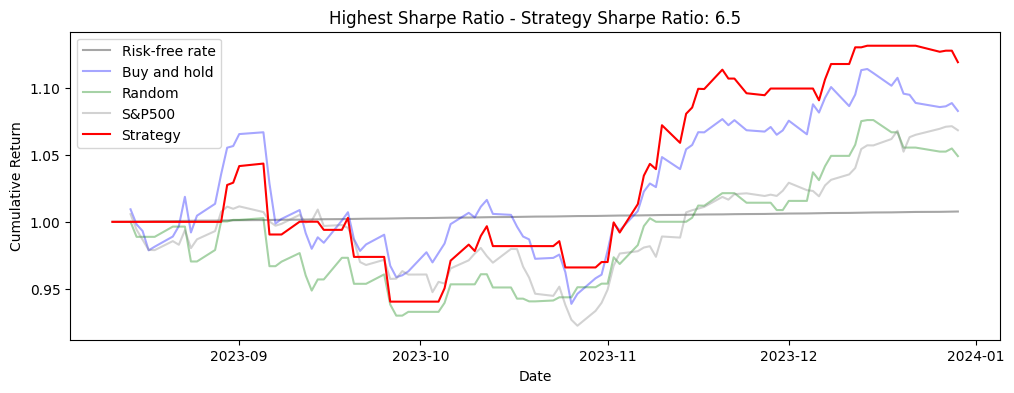

In [ ]:
plot_results_util(hyperparameters, 'sharpe')

### Max Returns Model

Buy and hold Sharpe Ratio 1.1
Random Sharpe Ratio 0.78
S&P500 Sharpe Ratio 1.3
          


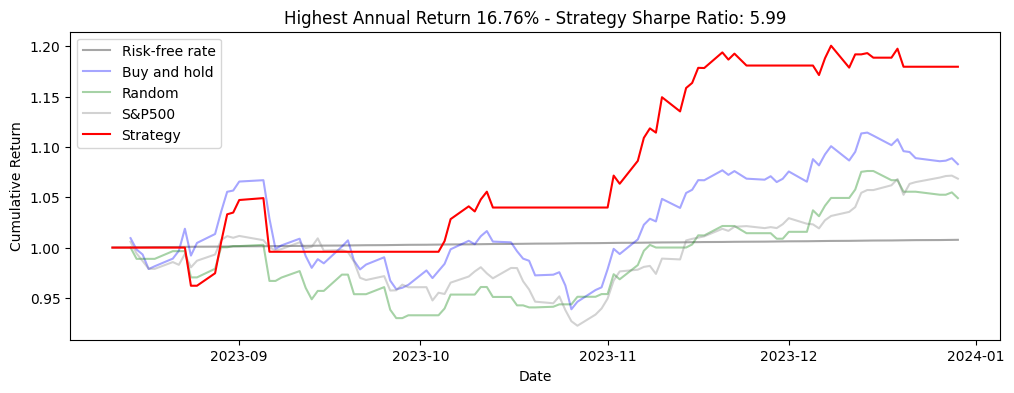

In [ ]:
plot_results_util(hyperparameters, 'net_return')

### Lowest Volatility Model

Buy and hold Sharpe Ratio 1.1
Random Sharpe Ratio 0.78
S&P500 Sharpe Ratio 1.3
          


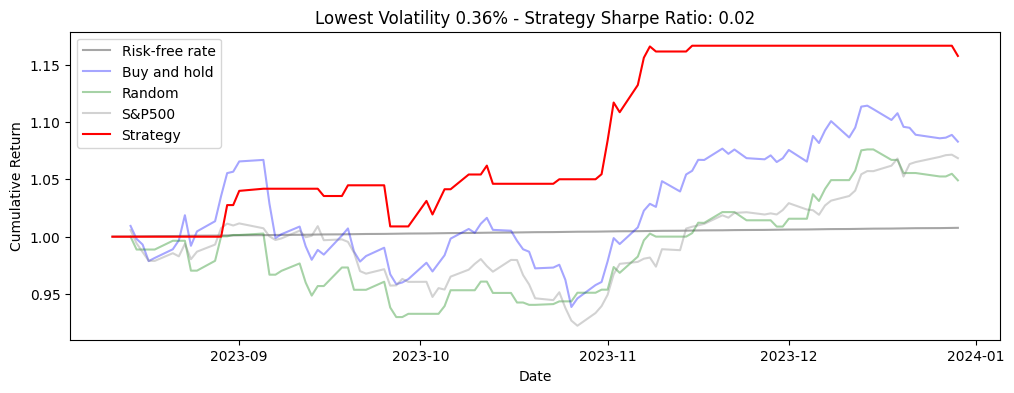

In [ ]:
plot_results_util(hyperparameters, 'vol')

### Highest Accuracy Model

Buy and hold Sharpe Ratio 1.1
Random Sharpe Ratio 0.78
S&P500 Sharpe Ratio 1.3
          


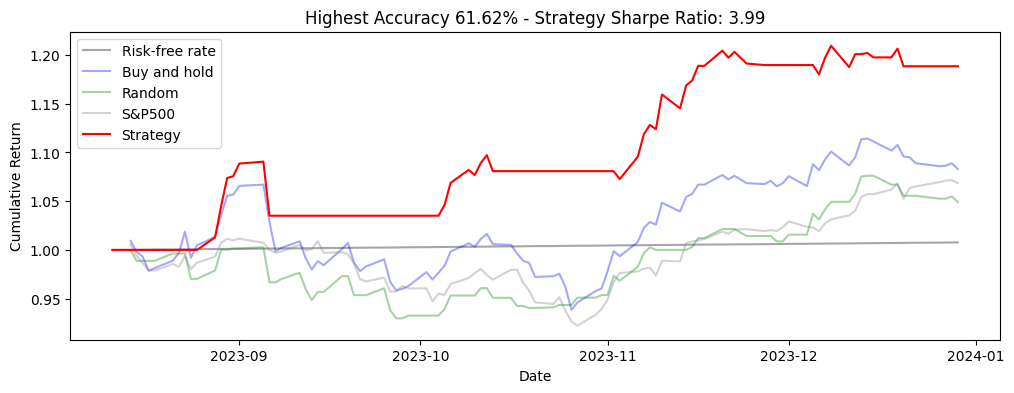

In [ ]:
plot_results_util(hyperparameters, 'accuracy')

## Feature Importance
We can also check which features are the most important for a model. For example, we can check the feature importance for the model that resulted in the highest net returns.

In [ ]:
hyperparameters.sort_values('net_return', ascending=False).head(3)

,net_return,vol,sharpe,accuracy,max_depth,n_estimators
MD-2_E-100,0.167588,0.004876,5.987591,0.585859,2.0,100.0
MD-6_E-250,0.156661,0.004154,6.495878,0.545455,6.0,250.0
MD-4_E-100,0.142444,0.004247,5.688686,0.525253,4.0,100.0


In [ ]:
# get the hyperparameters of the model that resulted in the highest net returns
max_depth = hyperparameters.sort_values('net_return', ascending=False).iloc[0]['max_depth'].astype(int)
n_estimators = hyperparameters.sort_values('net_return', ascending=False).iloc[0]['n_estimators'].astype(int)

model = RandomForestClassifier(max_depth=max_depth,
                               n_estimators=n_estimators,
                               random_state=1)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=1)

We can observe that the 5-days rate of change (ROC_5), the 5-days difference in the closing price (Momentum_5), and the Relative Strength Index (RSI_14) are the three most important features for this model, representing approximately 51% of the total feature importance of the model.

In [ ]:
# check the top 10 most important features
features_importance_df = pd.DataFrame(model.feature_importances_,
                                      index=model.feature_names_in_,
                                      columns=['Importance']).sort_values(by='Importance', ascending=False).round(3)

features_importance_df.head(10)

,Importance
ROC_5,0.221
Momentum_5,0.186
RSI_14,0.103
ROC_10,0.090
Momentum_10,0.077
Volume_Change,0.067
Momentum_20,0.064
Volume,0.029
MACD,0.027
ROC_20,0.023


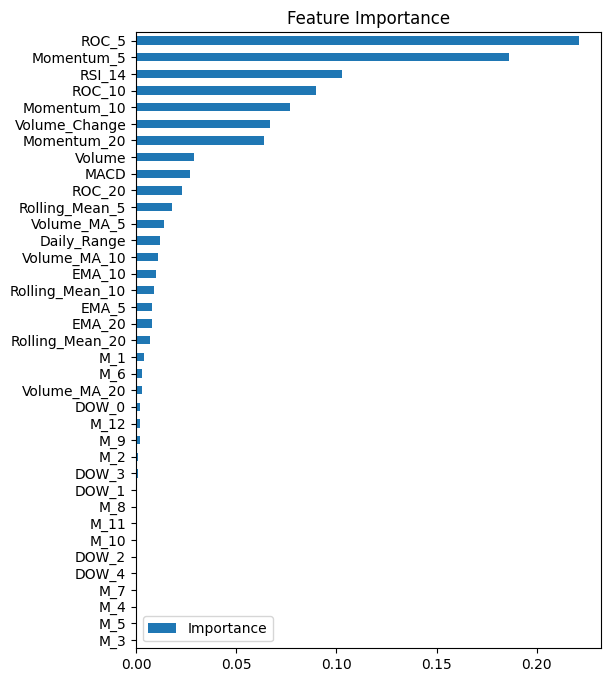

In [ ]:
# plot the feature importance
features_importance_df = features_importance_df.sort_values(by='Importance', ascending=True)
features_importance_df.plot(kind='barh', figsize=(6,8))
plt.title('Feature Importance')
plt.show()